In [160]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers as opt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import losses
import pandas as pd
import seaborn as sns

In [2]:
DATA_PATH="./Vowel_Data/Formant/"
n_time_sample=50

In [4]:
seed=15

In [5]:
def get_formant(file_path,max_len=n_time_sample):
    formant=pd.read_csv(file_path,
                delim_whitespace=True,
                header=None,
                names=["time","F1","F2","F3","F4","F5"],
                dtype=np.float64,
                na_values="--undefined--")
    return formant

def get_all_formants(path=DATA_PATH):
    labels=labels=sorted(os.listdir(path))
    all_formant=pd.DataFrame() #empty dataframe to store all_formants
    
    for label_index,label in enumerate(labels):
        folder_formant=pd.DataFrame() #empty dataframe to store formants of indivuals vowels/words i.e. folders

        formant_files=[path + label + '/' + file for file in sorted(os.listdir(path+'/'+label))]
        for file in tqdm(formant_files,"Reading Formants of label -'{}'".format(label)):
            #print(file)
            individual_formant=get_formant(file_path=file)
            folder_formant=folder_formant.append(individual_formant,ignore_index=True)
        
        folder_formant['label']=label_index  #new columns for encoding label
        
        all_formant=all_formant.append(folder_formant,ignore_index=True)
        
    return all_formant

def get_train_test(split_ratio=0.8,random_state=42):
    all_formants=get_all_formants()
    
    X=all_formants.drop(labels=['label'],axis=1).values
    y=all_formants['label'].values

    assert X.shape[0] == len(y)
    return train_test_split(X,y,test_size=(1-split_ratio),random_state=random_state,shuffle=True,stratify=y)

In [105]:
np.random.seed(seed)
X_train, X_test, y_train, y_test=get_train_test()
y_train_hot=to_categorical(y_train)
y_test_hot=to_categorical(y_test)

Reading Formants of label -'Formant7': 100%|██████████| 40/40 [00:00<00:00, 392.94it/s]


In [106]:
model_v=Sequential()
#model_v.add(Dense(128, activation='relu', input_shape=(6,)))
#model_v.add(Dense(64, activation='relu'))
model_v.add(Dense(32, activation='tanh'))
model_v.add(Dense(16, activation='tanh'))
model_v.add(Dense(7, activation='softmax'))

In [107]:
model_v.compile(
    #optimizer=opt.SGD(learning_rate=0.005,momentum=0.9),
    optimizer=opt.Adam(learning_rate=0.005),
    #loss=losses.CategoricalCrossentropy(),
    loss='categorical_crossentropy',
    #metrics=['AUC'],
    #metrics=['accuracy']#,
    metrics=[['accuracy','AUC']]
)

In [108]:
history_v=model_v.fit(X_train, y_train_hot, epochs=50, batch_size=X_train.shape[0], validation_data=(X_test,y_test_hot))

Epoch 1/50
1/1 [==============================] - 0s 422ms/step - loss: 2.2668 - accuracy: 0.1105 - auc: 0.4755 - val_loss: 2.1030 - val_accuracy: 0.1126 - val_auc: 0.4882
Epoch 2/50
1/1 [==============================] - 0s 160ms/step - loss: 2.1017 - accuracy: 0.1139 - auc: 0.4897 - val_loss: 2.0229 - val_accuracy: 0.1055 - val_auc: 0.5067
Epoch 3/50
1/1 [==============================] - 0s 95ms/step - loss: 2.0181 - accuracy: 0.1094 - auc: 0.5097 - val_loss: 1.9749 - val_accuracy: 0.1659 - val_auc: 0.5410
Epoch 4/50
1/1 [==============================] - 0s 111ms/step - loss: 1.9715 - accuracy: 0.1696 - auc: 0.5426 - val_loss: 1.9411 - val_accuracy: 0.2192 - val_auc: 0.5691
Epoch 5/50
1/1 [==============================] - 0s 91ms/step - loss: 1.9300 - accuracy: 0.2238 - auc: 0.5778 - val_loss: 1.9086 - val_accuracy: 0.2196 - val_auc: 0.5973
Epoch 6/50
1/1 [==============================] - 0s 95ms/step - loss: 1.8991 - accuracy: 0.2249 - auc: 0.6042 - val_loss: 1.8782 - val_accura

In [109]:
history_dict=history_v.history

loss_v=history_dict['loss']
val_loss_v=history_dict['val_loss']

epochs=range(1,len(loss_v)+1)

acc_v=history_dict['accuracy']
val_acc_v=history_dict['val_accuracy']

auc_v=history_dict['auc']
val_auc_v=history_dict['val_auc']

In [110]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'auc', 'val_loss', 'val_accuracy', 'val_auc'])

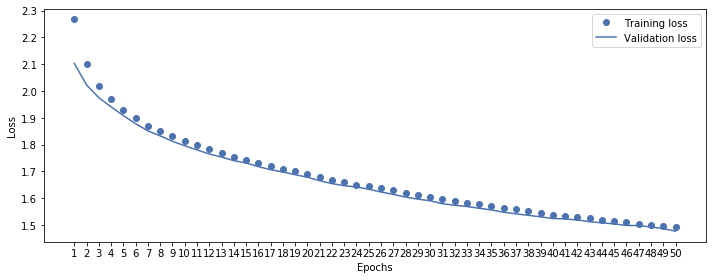

In [188]:
plt.figure(figsize=(10,4))
plt.plot(epochs,loss_v,'bo',label='Training loss')
plt.plot(epochs,val_loss_v,'b',label='Validation loss')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig('./Result/New_without_CNN/loss_vowel_'+save_specifier+'.svg',format='svg', dpi=600)

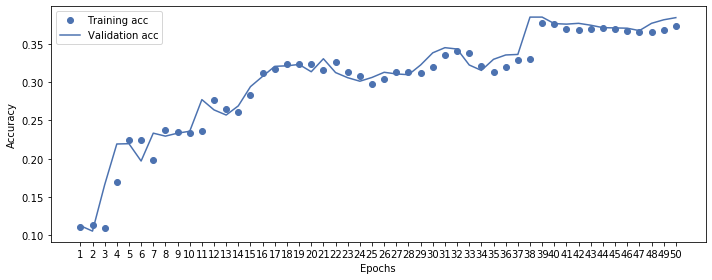

In [189]:
plt.figure(figsize=(10,4))
plt.plot(epochs,acc_v,'bo',label='Training acc')
plt.plot(epochs,val_acc_v,'b',label='Validation acc')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('./Result/New_without_CNN/accuracy_vowel_'+save_specifier+'.svg',format='svg', dpi=600)

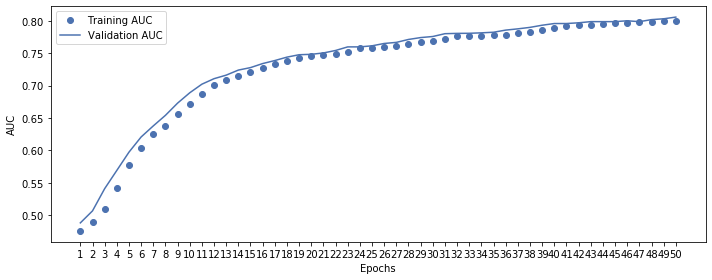

In [190]:
plt.figure(figsize=(10,4))
plt.plot(epochs,auc_v,'bo',label='Training AUC')
plt.plot(epochs,val_auc_v,'b',label='Validation AUC')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.tight_layout()
plt.savefig('./Result/New_without_CNN/AUC_vowel_'+save_specifier+'.svg',format='svg', dpi=600)

In [114]:
DATA_PATH="./Word_Data/Formant/"
n_time_sample=70

In [115]:
def get_formant(file_path,max_len=n_time_sample):
    formant=pd.read_csv(file_path,
                delim_whitespace=True,
                header=None,
                names=["time","F1","F2","F3","F4","F5"],
                dtype=np.float64,
                na_values="--undefined--")
    return formant

def get_all_formants(path=DATA_PATH):
    labels=labels=sorted(os.listdir(path))
    all_formant=pd.DataFrame() #empty dataframe to store all_formants
    
    for label_index,label in enumerate(labels):
        folder_formant=pd.DataFrame() #empty dataframe to store formants of indivuals vowels/words i.e. folders

        formant_files=[path + label + '/' + file for file in sorted(os.listdir(path+'/'+label))]
        for file in tqdm(formant_files,"Reading Formants of label -'{}'".format(label)):
            #print(file)
            individual_formant=get_formant(file_path=file)
            folder_formant=folder_formant.append(individual_formant,ignore_index=True)
        
        folder_formant['label']=label_index  #new columns for encoding label
        
        all_formant=all_formant.append(folder_formant,ignore_index=True)
        
    return all_formant

def get_train_test(split_ratio=0.8,random_state=42):
    all_formants=get_all_formants()
    
    X=all_formants.drop(labels=['label'],axis=1).values
    y=all_formants['label'].values

    assert X.shape[0] == len(y)
    return train_test_split(X,y,test_size=(1-split_ratio),random_state=random_state,shuffle=True,stratify=y)

In [116]:
np.random.seed(seed)
X_train, X_test, y_train, y_test=get_train_test()
y_train_hot=to_categorical(y_train)
y_test_hot=to_categorical(y_test)

Reading Formants of label -'Formant7': 100%|██████████| 40/40 [00:00<00:00, 223.73it/s]


In [117]:
model_w=Sequential()
#model_w.add(Dense(128, activation='tanh', input_shape=(6,)))
#model_w.add(Dense(64, activation='tanh'))
model_w.add(Dense(32, activation='tanh'))
model_w.add(Dense(16, activation='tanh'))
model_w.add(Dense(7, activation='softmax'))

In [120]:
model_w.compile(
    #optimizer=opt.SGD(learning_rate=0.005,momentum=0.9),
    optimizer=opt.Adam(learning_rate=0.005),
    #loss=losses.CategoricalCrossentropy(),
    loss='categorical_crossentropy',
    #metrics=['AUC'],
    #metrics=['accuracy']#,
    metrics=[['accuracy','AUC']]
)

In [121]:
history_w=model_w.fit(X_train, y_train_hot, epochs=50, batch_size=X_train.shape[0], validation_data=(X_test,y_test_hot))

Epoch 1/50
1/1 [==============================] - 0s 337ms/step - loss: 2.1862 - accuracy: 0.1439 - auc: 0.4864 - val_loss: 2.0527 - val_accuracy: 0.1450 - val_auc: 0.4945
Epoch 2/50
1/1 [==============================] - 0s 115ms/step - loss: 2.0468 - accuracy: 0.1502 - auc: 0.4985 - val_loss: 1.9813 - val_accuracy: 0.2227 - val_auc: 0.5276
Epoch 3/50
1/1 [==============================] - 0s 155ms/step - loss: 1.9761 - accuracy: 0.2238 - auc: 0.5310 - val_loss: 1.9433 - val_accuracy: 0.1727 - val_auc: 0.5547
Epoch 4/50
1/1 [==============================] - 0s 194ms/step - loss: 1.9379 - accuracy: 0.1750 - auc: 0.5585 - val_loss: 1.9172 - val_accuracy: 0.2491 - val_auc: 0.5846
Epoch 5/50
1/1 [==============================] - 0s 110ms/step - loss: 1.9094 - accuracy: 0.2574 - auc: 0.5892 - val_loss: 1.9069 - val_accuracy: 0.2527 - val_auc: 0.5947
Epoch 6/50
1/1 [==============================] - 0s 142ms/step - loss: 1.9036 - accuracy: 0.2574 - auc: 0.5938 - val_loss: 1.9013 - val_acc

In [122]:
history_dict=history_w.history
loss_w=history_dict['loss']
val_loss_w=history_dict['val_loss']

epochs=range(1,len(loss_v)+1)

acc_w=history_dict['accuracy']
val_acc_w=history_dict['val_accuracy']

auc_w=history_dict['auc']
val_auc_w=history_dict['val_auc']

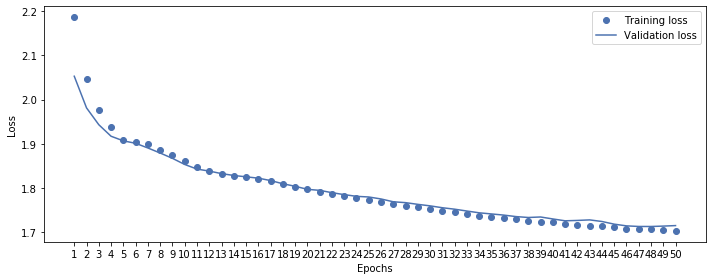

In [187]:
plt.figure(figsize=(10,4))
plt.plot(epochs,loss_w,'bo',label='Training loss')
plt.plot(epochs,val_loss_w,'b',label='Validation loss')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig('./Result/New_without_CNN/loss_word_'+save_specifier+'.svg',format='svg', dpi=600)

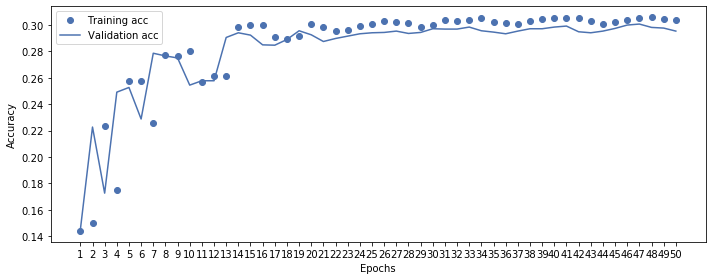

In [186]:
plt.figure(figsize=(10,4))
plt.plot(epochs,acc_w,'bo',label='Training acc')
plt.plot(epochs,val_acc_w,'b',label='Validation acc')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('./Result/New_without_CNN/accuracy_word_'+save_specifier+'.svg',format='svg', dpi=600)

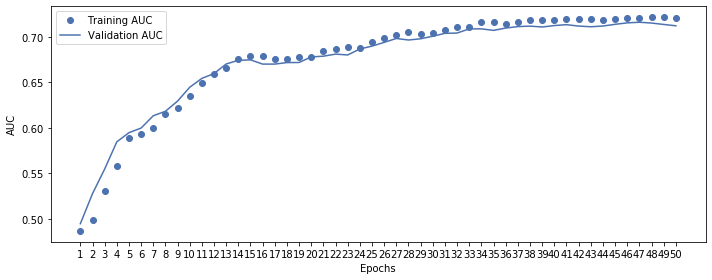

In [185]:
plt.figure(figsize=(10,4))
plt.plot(epochs,auc_w,'bo',label='Training AUC')
plt.plot(epochs,val_auc_w,'b',label='Validation AUC')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.tight_layout()
plt.savefig('./Result/New_without_CNN/AUC_word_'+save_specifier+'.svg',format='svg', dpi=600)

In [126]:
#COMPARE

In [127]:
epochs=range(1,len(loss_v)+1)

In [132]:
save_specifier='fromant_32_16_tanh_softmax_adam_0.005_batchfull'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


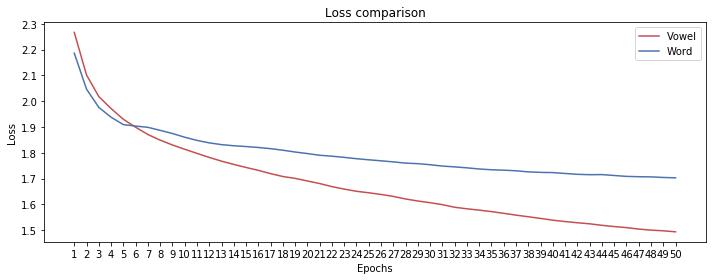

In [177]:
#sns.reset()
#sns.reset_orig()
plt.figure(figsize=(10,4))
plt.plot(epochs,loss_v,'r',label='Vowel')
plt.plot(epochs,loss_w,'b',label='Word')
plt.title('Loss comparison')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig('./Result/New_without_CNN/loss_compare_'+save_specifier+'.svg',format='svg',dpi=600)
plt.savefig('./Result/New_without_CNN/loss_compare_'+save_specifier+'.eps',format='eps',dpi=600)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


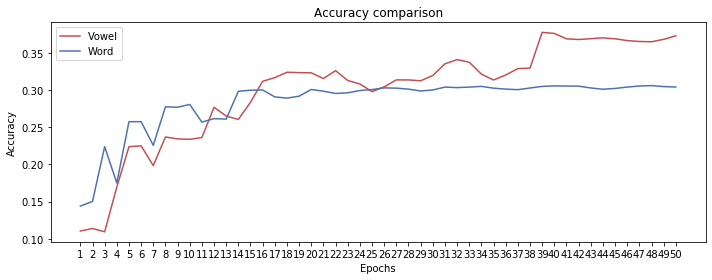

In [178]:
plt.figure(figsize=(10,4))
plt.plot(epochs,acc_v,'r',label='Vowel')
plt.plot(epochs,acc_w,'b',label='Word')
plt.title('Accuracy comparison')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
#plt.savefig('./Result/New_without_CNN/accuracy_compate_'+save_specifier+'.svg',format='svg',dpi=600)
plt.savefig('./Result/New_without_CNN/accuracy_compate_'+save_specifier+'.eps',format='eps',dpi=600)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


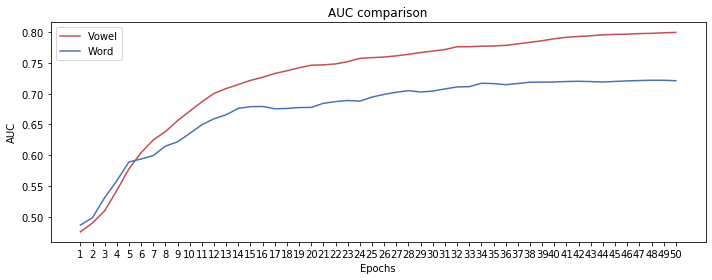

In [179]:
plt.figure(figsize=(10,4))
plt.plot(epochs,auc_v,'r',label='Vowel')
plt.plot(epochs,auc_w,'b',label='Word')
plt.title('AUC comparison')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.tight_layout()
#plt.savefig('./Result/New_without_CNN/AUC_compate_'+save_specifier+'.svg',format='svg',dpi=600)
plt.savefig('./Result/New_without_CNN/AUC_compate_'+save_specifier+'.eps',format='eps',dpi=600)

In [143]:
all_compare_df=pd.DataFrame({'loss_v':loss_v,
                      'val_loss_v':val_loss_v,
                      'acc_v':acc_v,
                      'val_acc_v':val_acc_v,
                      'auc_v':auc_v,
                      'val_auc_v':val_auc_v,
                      'loss_w':loss_w,
                      'val_loss_w':val_loss_w,
                      'acc_w':acc_w,
                      'val_acc_w':val_acc_w,
                      'auc_w':auc_w,
                      'val_auc_w':val_auc_w
                     })

all_compare_df.to_csv('./Result/New_without_CNN/all_compare_data_'+save_specifier+'.csv')

In [144]:
all_compare_df.tail()

,loss_v,val_loss_v,acc_v,val_acc_v,auc_v,val_auc_v,loss_w,val_loss_w,acc_w,val_acc_w,auc_w,val_auc_w
45,1.510234,1.498732,0.366437,0.370279,0.796772,0.800146,1.708708,1.714930,0.303956,0.299898,0.720853,0.715563
46,1.504479,1.498546,0.365201,0.367102,0.797813,0.798793,1.707437,1.713586,0.305353,0.300660,0.721409,0.716229
47,1.500465,1.493217,0.364848,0.376633,0.798146,0.801928,1.706840,1.713536,0.305924,0.298121,0.721904,0.715366
48,1.497878,1.487364,0.368114,0.381221,0.799064,0.803229,1.704514,1.714414,0.304591,0.297613,0.721866,0.713816
49,1.493867,1.477454,0.372881,0.384045,0.799755,0.805838,1.703115,1.715560,0.304019,0.295328,0.721080,0.712323
